## Clustering

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel("kmeans_dataset.xlsx")
df.head()

,ID Tag,Model,WO count,AVG Labor,Labor Cost,No Problem,Avg Cost,Travel,Travel Cost,Department
0,1,MYLAB ALPHA,10,43.333333,54.166667,0,0.0,2.0,150.0,CARDIOVASCULAR IMAGING
1,2,ASPEN,1,24.000000,30.000000,0,0.0,2.0,150.0,CARDIOVASCULAR IMAGING
2,3,IE33,4,210.000000,262.500000,0,0.0,2.0,150.0,CARDIOVASCULAR IMAGING
3,4,BVI 9400,9,54.666667,68.333333,1,0.0,2.0,150.0,REHAB CENTER
4,5,BVI 9400,1,102.000000,127.500000,0,0.0,2.0,150.0,REHAB CENTER


Now, we are going to drop a few columns: ID Tag – is a random number, has no value in clustering. Then Model and Department,as they are text and while there are ways to work with the text, it is more complicated so for now, we are just going to drop the columns

In [2]:
df1 = df.drop(["ID Tag", "Model", "Department"], axis = 1)
df1.head()

,WO count,AVG Labor,Labor Cost,No Problem,Avg Cost,Travel,Travel Cost
0,10,43.333333,54.166667,0,0.0,2.0,150.0
1,1,24.000000,30.000000,0,0.0,2.0,150.0
2,4,210.000000,262.500000,0,0.0,2.0,150.0
3,9,54.666667,68.333333,1,0.0,2.0,150.0
4,1,102.000000,127.500000,0,0.0,2.0,150.0


So now the question is how to determine the optimal number of clusters.One thing you can do is check the distance from you points to the cluster center using inertia_ function from scikit learn.

To make it explicit, we can look at a list of interia_ for a range of cluster choices by setting up a loop. The value you'll get for each iteration will be the sum of distances from your sample points to the cluster center. 

Now lets import KMeans from sklearn.cluster

We then initialize KMeans 
- n_clusters : number of clusters you want, 
- init : sets how the centroids are places. k-means++ is one of the faster methods of centroid placement, 
- n_init : number times the algorithm with run placing new centroids each iteration

In [3]:
from sklearn.cluster import KMeans
km_inertia = []
n = int(input("Enter Starting Cluster: "))
n1 = int(input("Enter Ending Cluster: "))
for i in range(n,n1):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10)
    km.fit(df1)
    print (i, km.inertia_)
    km_inertia.append(km.inertia_)

Enter Starting Cluster: 2
Enter Ending Cluster: 18
2 3191232.4084
3 2433102.95989
4 1955241.38215
5 1578178.36016
6 1213718.85507
7 990478.924291
8 812663.213339
9 688472.293251
10 600568.386088
11 525305.691084
12 439631.688917
13 407793.147778
14 382516.917567
15 349200.469282
16 331661.549306
17 302050.615782


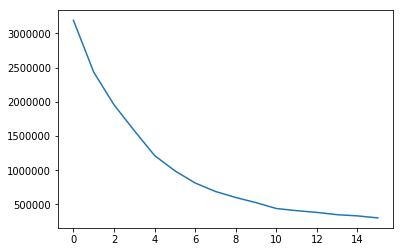

In [4]:
plt.plot(km_inertia)

The trick to reading the results is look for the point of diminishing returns. Cluster 12 is where I would look. The changes in values start slowing down here. 

The drop in number goes from couple hundred thousands to ten thousands. That is a diminished return. The new result is not that much better than the earlier result. As opposed to #11 and #12 where #12 clusters perform 100,000 units better.

Fit the model with the settled number of clusters. 

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=12, init='k-means++', n_init=10)

The result is the sum of distances from your sample points to the cluster center.

What you need to do is look at a list of interia_ for a range of cluster choices.

*inertia_ : Sum of distances of samples to their closest cluster center.*

Now, export the cluster identifiers to a list. Notice my values are 0 - 3. One value for each cluster.

In [6]:
x = km.fit_predict(df1)
x

array([ 3,  3, 10,  3,  6, 10,  1,  6,  0,  0,  0, 10,  7,  6,  1,  3,  6,
        6,  0,  3,  0,  3,  5,  5,  3,  6,  1,  6,  6,  9,  6,  3,  6, 11,
        6,  9, 10,  0,  6,  7,  0,  6,  6,  3,  6,  3,  6, 10,  6, 10,  3,
        6, 10,  3, 10,  4,  3,  3, 10,  6,  6,  6,  6,  3,  6,  3,  6,  6,
        6,  7,  7,  7,  6,  0,  0,  7,  0,  0,  5,  0,  0,  0,  7,  0,  0,
        0,  0,  0,  0,  7,  0,  0,  7,  7,  7,  7,  0,  2,  0,  7,  5,  0,
        7,  0,  0,  0,  0,  7,  0,  0,  0,  7,  5,  0,  5,  0,  7,  7,  7,
        0,  0,  5,  0,  7,  1,  6,  6,  0,  0,  7,  0,  0,  0,  7,  0,  7,
        7,  7,  0,  7,  0,  0,  0,  0, 11,  7,  7,  7,  0,  0,  0,  0,  3,
        3, 10, 10, 10, 10,  6,  3,  3,  6,  8,  5,  8,  8,  8,  8,  5,  8,
        8,  8,  5,  8,  8,  8,  8,  8,  8, 11,  8,  8,  8,  8,  8, 11,  8,
       11,  8, 11,  8,  8,  8,  8,  8, 11], dtype=int32)

Create a new column on the original dataframe called Cluster and place your results (x) in that column



In [7]:
df["Cluster"]= x
df.head()

,ID Tag,Model,WO count,AVG Labor,Labor Cost,No Problem,Avg Cost,Travel,Travel Cost,Department,Cluster
0,1,MYLAB ALPHA,10,43.333333,54.166667,0,0.0,2.0,150.0,CARDIOVASCULAR IMAGING,3
1,2,ASPEN,1,24.000000,30.000000,0,0.0,2.0,150.0,CARDIOVASCULAR IMAGING,3
2,3,IE33,4,210.000000,262.500000,0,0.0,2.0,150.0,CARDIOVASCULAR IMAGING,10
3,4,BVI 9400,9,54.666667,68.333333,1,0.0,2.0,150.0,REHAB CENTER,3
4,5,BVI 9400,1,102.000000,127.500000,0,0.0,2.0,150.0,REHAB CENTER,6


Let's sort the dataframe by cluster.

In [8]:
df = df.sort_values(['Cluster'])
df

,ID Tag,Model,WO count,AVG Labor,Labor Cost,No Problem,Avg Cost,Travel,Travel Cost,Department,Cluster
119,120,IE33,111,132.432432,165.540541,3,2.972973,1.000000,75.000000,CARDIAC NON-INVASIVE,0
120,121,IE33,67,118.208955,147.761194,3,9.507463,1.000000,75.000000,CARDIAC NON-INVASIVE,0
79,80,VIVID-I,49,129.795918,162.244898,1,45.002245,1.000000,75.000000,PEDIATRIC CARDIOLOGY,0
115,116,S5,34,103.764706,129.705882,1,25.352941,1.000000,75.000000,CATH LAB,0
113,114,S5I,40,139.200000,174.000000,0,47.275000,1.000000,75.000000,CATH LAB,0
110,111,SEQUOIA,40,126.450000,158.062500,1,0.000000,1.000000,75.000000,CARDIAC ELECTROPHYSIOLOGY,0
109,110,HAWK 2102EXL,10,123.000000,153.750000,0,0.000000,1.000000,75.000000,OPERATING ROOM,0
108,109,LOGIQ P5,7,94.285714,117.857143,0,0.000000,1.000000,75.000000,OPERATING ROOM,0
37,38,LOGIQ E,6,86.400000,108.000000,0,0.000000,1.000000,75.000000,BREAST SURGERY CTR,0
106,107,S SERIES,7,95.000000,118.750000,1,0.000000,1.000000,75.000000,ANESTHESIA,0


Export it into excel sheet where you can observe the full data with divided clusters.

In [9]:
!pip install openpyxl

In [10]:
from pandas import ExcelWriter

writer = ExcelWriter('clustered.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

Now as you start to examine the data in each cluster, you show start to see patterns emerge.
For example, it could be: 

- Cluster 0: Low work order and labor count
- Cluster 1: High labor and parts cost
- Cluster 2: Low travel cost 
- Cluster 3: High work order and "No problem found" count

---